In [ ]:
from IPython.core.display import HTML
with open('style.css', 'r') as file:
    css = file.read()
HTML(css)

# Solving the Wolf-Goat-Cabbage Problem

An agricultural economist has to sell a *wolf*, a *goat*, and a *cabbage* on a market place.  In order to
reach the market place, she has to cross a river.  The boat that she can use is so small that it can
only accommodate either the goat, the wolf, or the cabbage in addition to the agricultural economist.
Now if the agricultural economist leaves the wolf alone with the goat, the wolf will eat the goat.
If, instead, the agricultural economist leaves the goat with the cabbage, the goat will eat the cabbage.
Is it possible for the agricultural economist to develop a schedule that allows her to cross the river
without either the goat or the cabbage being eaten?

In [1]:
%run Breadth-First-Search.ipynb

The function $\texttt{power}(M)$ defined below computes the power set of the set $M$, i.e. we have:
$$ \texttt{power}(M) = 2^M = \bigl\{A \mid A \subseteq M \} $$

In [2]:
def power(M):
    "This function computes the power set of the set M."
    if M == set():
        return { frozenset() }
    else:
        C  = set(M)  # C is a copy of M as we don't want to change the set M
        x  = C.pop() # pop removes the element x from the set C
        P1 = power(C)
        P2 = { A | {x} for A in P1 }
        return P1 | P2

## Problem Specific Code

There is a problem if the wolf is alone with the goat or if the goat is alone with the cabbage.

In [3]:
def problem(S):
    '''
    S is a set of objects that are at one shore of the river.
    This function returns <tt>True</tt> if there is a problem.
    '''
    return ('farmer' not in S) and             \
           (('goat' in S and 'cabbage' in S) or   # goat eats cabbage
            ('wolf' in S and 'goat'    in S)   )  # wolf eats goat

At the start, everything is on the left shore.  
Note that we have to use `frozenset`s here as the states will be stored in tuples that are itself stored in sets.

In [4]:
All = frozenset({ 'farmer', 'wolf', 'goat', 'cabbage' })

<tt>States</tt> is the set of all states that do not have a problem.

In [5]:
States = { S for S in power(All) if not problem(S) and 
                                    not problem(All - S) 
         }
States

{frozenset(),
 frozenset({'wolf'}),
 frozenset({'cabbage', 'farmer', 'wolf'}),
 frozenset({'goat'}),
 frozenset({'cabbage'}),
 frozenset({'farmer', 'goat'}),
 frozenset({'cabbage', 'farmer', 'goat'}),
 frozenset({'farmer', 'goat', 'wolf'}),
 frozenset({'cabbage', 'wolf'}),
 frozenset({'cabbage', 'farmer', 'goat', 'wolf'})}

<tt>R1</tt> decribes the transitions where the boat crosses the river from left to right.

In [25]:
R1 = { (S, S - B) for S in States 
                  for B in power(S)
                  if S - B in States and 'farmer' in B and len(B) <= 2
     }
R1

{(frozenset({'farmer', 'goat'}), frozenset()),
 (frozenset({'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'farmer', 'goat', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'farmer', 'goat', 'wolf'}), frozenset({'goat'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'cabbage'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'cabbage', 'wolf'})),
 (frozenset({'cabbage', 'farmer', 'goat'}), frozenset({'cabbage'})),
 (frozenset({'cabbage', 'farmer', 'goat', 'wolf'}),
  frozenset({'cabbage', 'wolf'}))}

<tt>R2</tt> is the inverse of <tt>R1</tt>.

In [26]:
R2 = { (S2, S1) for (S1, S2) in R1 }

In [27]:
R = R1 | R2
R

{(frozenset(), frozenset({'farmer', 'goat'})),
 (frozenset({'cabbage'}), frozenset({'cabbage', 'farmer', 'goat'})),
 (frozenset({'goat'}), frozenset({'farmer', 'goat'})),
 (frozenset({'goat'}), frozenset({'farmer', 'goat', 'wolf'})),
 (frozenset({'goat'}), frozenset({'cabbage', 'farmer', 'goat'})),
 (frozenset({'farmer', 'goat'}), frozenset()),
 (frozenset({'farmer', 'goat', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'wolf'}), frozenset({'cabbage', 'farmer', 'wolf'})),
 (frozenset({'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'wolf'}), frozenset({'farmer', 'goat', 'wolf'})),
 (frozenset({'cabbage'}), frozenset({'cabbage', 'farmer', 'wolf'})),
 (frozenset({'cabbage', 'wolf'}), frozenset({'cabbage', 'farmer', 'wolf'})),
 (frozenset({'cabbage', 'wolf'}),
  frozenset({'cabbage', 'farmer', 'goat', 'wolf'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}

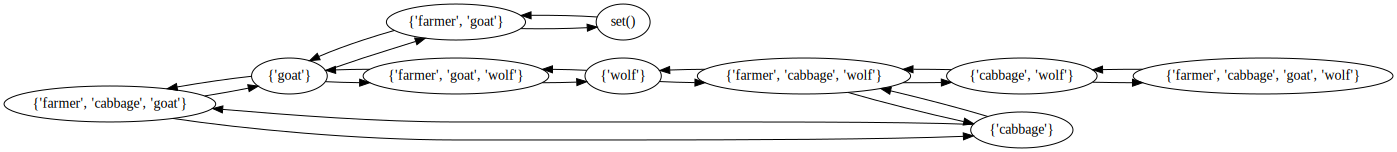

In [9]:
dot = dot_graph(R)
dot

In [30]:
dot.render('wolf-goat-cabbage')

'wolf-goat-cabbage.pdf'

At the beginning everything is on the left shore and nothing is on the right shore.   The goal is to have everybody on the right shore.  In that case, the left shore will be empty.

In [29]:
start = All
goal  = frozenset()
Path  = search(R, start, goal)
Path

(frozenset({'cabbage', 'farmer', 'goat', 'wolf'}),
 frozenset({'cabbage', 'wolf'}),
 frozenset({'cabbage', 'farmer', 'wolf'}),
 frozenset({'cabbage'}),
 frozenset({'cabbage', 'farmer', 'goat'}),
 frozenset({'goat'}),
 frozenset({'farmer', 'goat'}),
 frozenset())

## Auxiliary Code for Pretty Printing

The following code is used for printing the path that has been found.  We won't discuss the details of these functions.

In [31]:
def mkPair(S, All):
    "Given the left shore, compute both the left shore and the right shore."
    return (S, All - S);

def my_str(s):
    "Print frozen sets as sets."
    if len(s) == 0:
        return "{}"
    else:
        return str(set(s))
    
def printPath(Path, All):
    "print the path one transition at a time"
    for i in range(len(Path)):
        (S1, S2) = mkPair(Path[i], All)
        if (len(S1) == 0 or len(S2) == 0):
            print(my_str(S1), 33 * " ", my_str(S2))
        else:
            print(my_str(S1), 35 * " ", my_str(S2))
        if i + 1 == len(Path): 
            break
        (T1, T2) = mkPair(Path[i+1], All)        
        if "farmer" in S1:
            B = S1 - T1  # the boat crossing from left to right
            print("                         >>>> ", set(B), " >>>> ")
        else:
            B = S2 - T2  # the boat crossing from right to left
            print("                         <<<< ", set(B), " <<<< ")
printPath(Path, All)

{'farmer', 'cabbage', 'goat', 'wolf'}                                   {}
                         >>>>  {'farmer', 'goat'}  >>>> 
{'cabbage', 'wolf'}                                     {'farmer', 'goat'}
                         <<<<  {'farmer'}  <<<< 
{'farmer', 'cabbage', 'wolf'}                                     {'goat'}
                         >>>>  {'farmer', 'wolf'}  >>>> 
{'cabbage'}                                     {'farmer', 'goat', 'wolf'}
                         <<<<  {'farmer', 'goat'}  <<<< 
{'farmer', 'cabbage', 'goat'}                                     {'wolf'}
                         >>>>  {'farmer', 'cabbage'}  >>>> 
{'goat'}                                     {'farmer', 'cabbage', 'wolf'}
                         <<<<  {'farmer'}  <<<< 
{'farmer', 'goat'}                                     {'cabbage', 'wolf'}
                         >>>>  {'farmer', 'goat'}  >>>> 
{}                                   {'farmer', 'cabbage', 'goat', 'wolf'}
